
Variables in the .mat file:
- ans: shape (6, 10249)

Variables in the .mat file:
- ans: shape (11, 10249)


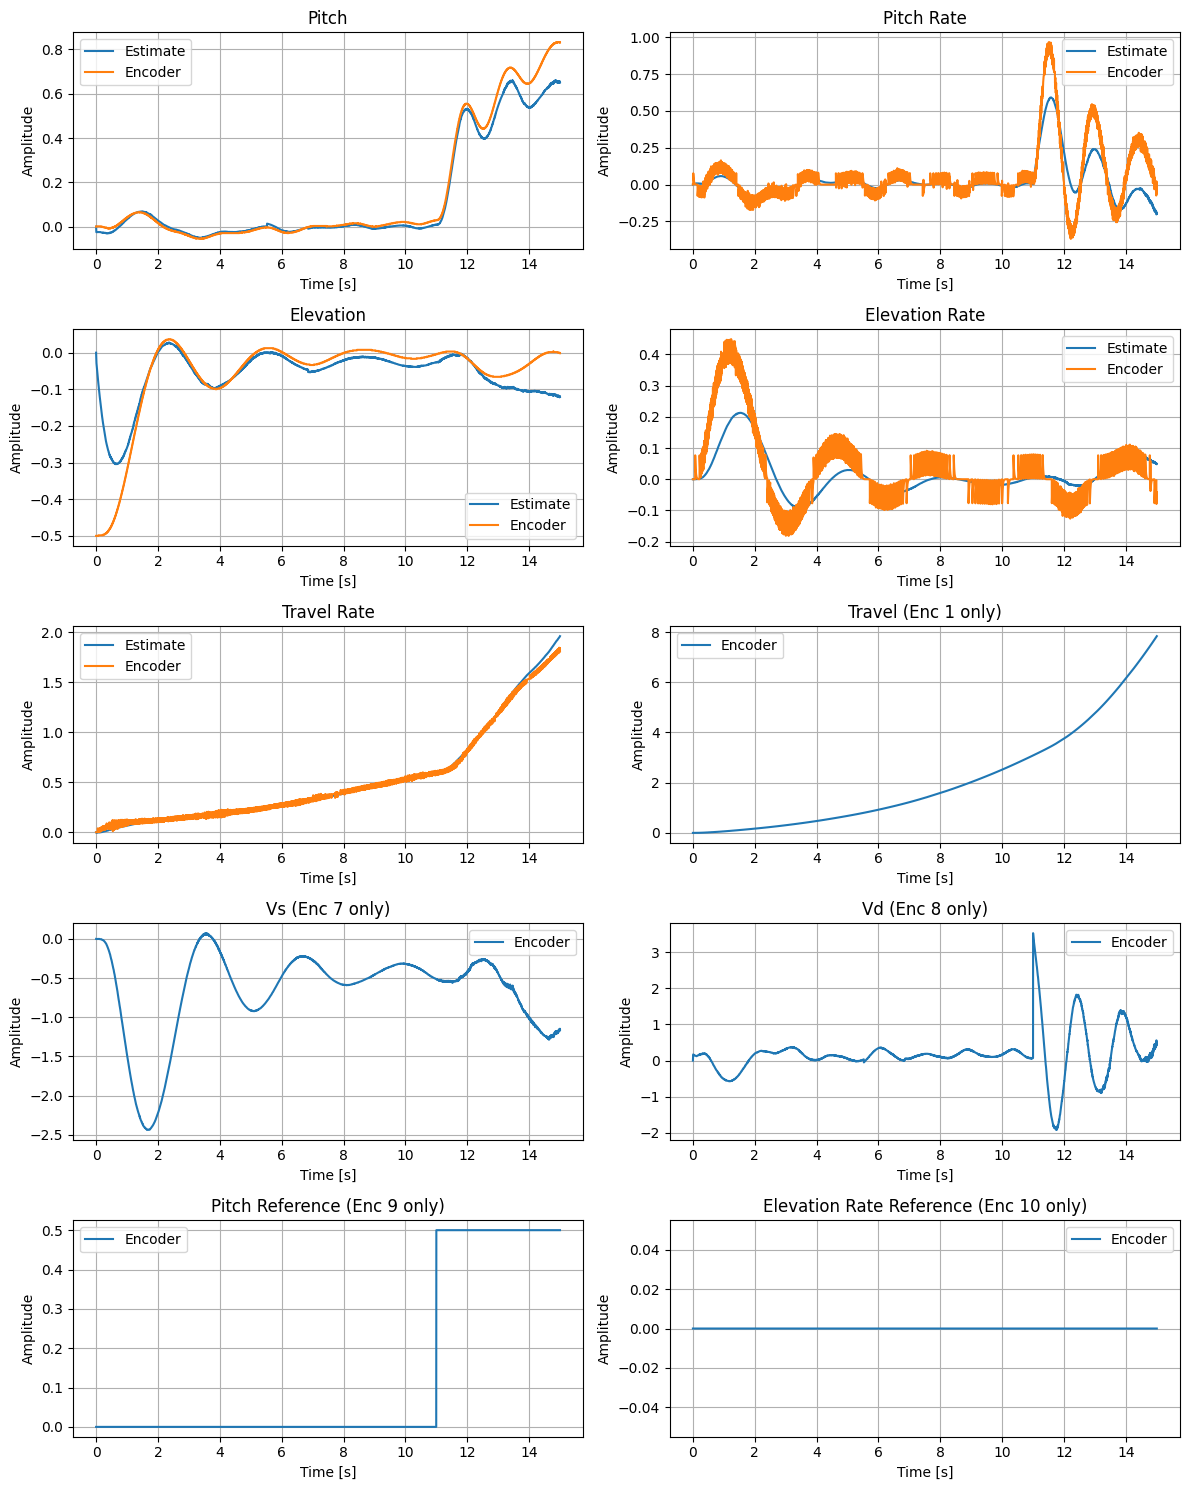

In [21]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------------------------
# FILES
# -----------------------------------------------------------
FILE_EST = 'measurements_lab3/estimate_measurement_Luenberger_minus(2_3_2_1-5_3).mat'
FILE_ENC = 'measurements_lab3/encoder_measurement_and_u_Luenberger_minus(2_3_2_1-5_3).mat'

# -----------------------------------------------------------
# MANUAL SIGNAL MAPPING
# Left  = estimate signal index
# Right = encoder signal index
#
# Only fill in the pairs you know match.
# Any signal not in this mapping will still be plotted alone.
# -----------------------------------------------------------
MAPPING = {
    1: 3,   # Pitch
    2: 4,   # Pitch Rate
    3: 5,   # Elevation
    4: 6,   # Elevation Rate
    5: 2,   # Rot Rate
}

# Optional display names (fallback: “Signal i”)
LABELS = {
    1: "Pitch",
    2: "Pitch Rate",
    3: "Elevation",
    4: "Elevation Rate",
    5: "Travel Rate",
}

ENCODER_LABELS = {
    1:"Travel",
    7: "Vs",
    8: "Vd",
    9: "Pitch Reference",
    10: "Elevation Rate Reference",
}

# -----------------------------------------------------------
# TIME WINDOW
# -----------------------------------------------------------
t_min = 0
t_max = 15

# -----------------------------------------------------------
# LOAD FILES
# -----------------------------------------------------------
def load_data(path):
    data = scipy.io.loadmat(path)
    print("\nVariables in the .mat file:")
    for key in data.keys():
        if not key.startswith("__"):
            val = data[key]
            print(f"- {key}: shape {val.shape if hasattr(val, 'shape') else type(val)}")
    return data["ans"]

est = load_data(FILE_EST)
enc = load_data(FILE_ENC)

# -----------------------------------------------------------
# TIME CROPPING
# -----------------------------------------------------------
time_est = est[0, :]
time_enc = enc[0, :]

mask_est = (time_est >= t_min) & (time_est <= t_max)
mask_enc = (time_enc >= t_min) & (time_enc <= t_max)

# -----------------------------------------------------------
# Determine which signals exist
# -----------------------------------------------------------
est_signals = set(range(1, est.shape[0]))   # skip index 0 (time)
enc_signals = set(range(1, enc.shape[0]))

mapped_est   = set(MAPPING.keys())
mapped_enc   = {v for v in MAPPING.values() if v is not None}

unmatched_est = est_signals - mapped_est
unmatched_enc = enc_signals - mapped_enc

# -----------------------------------------------------------
# Total number of subplots = matched + unmatched
# -----------------------------------------------------------
total_plots = len([i for i in MAPPING if MAPPING[i] is not None]) \
              + len(unmatched_est) + len(unmatched_enc)

cols = 2
rows = int(np.ceil(total_plots / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3))
axes = axes.flatten()

plot_i = 0

# -----------------------------------------------------------
# 1) Plot matched pairs
# -----------------------------------------------------------
for est_idx, enc_idx in MAPPING.items():
    if enc_idx is None:
        continue

    ax = axes[plot_i]

    est_signal = est[est_idx, mask_est]
    enc_signal = enc[enc_idx, mask_enc]

    ax.plot(time_est[mask_est], est_signal, label="Estimate")
    ax.plot(time_enc[mask_enc], enc_signal, label="Encoder")

    title = LABELS.get(est_idx, f"Signal {est_idx}")
    ax.set_title(title) #+ f" (Est {est_idx} ↔ Enc {enc_idx})"

    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Amplitude")
    ax.grid(True)
    ax.legend()

    plot_i += 1

#There are no signals like this. 
# # -----------------------------------------------------------
# # 2) Plot estimate-only signals
# # -----------------------------------------------------------
# for est_idx in unmatched_est:
#     ax = axes[plot_i]

#     est_signal = est[est_idx, mask_est]
#     ax.plot(time_est[mask_est], est_signal, label="Estimate")

#     title = LABELS.get(est_idx, f"Signal {est_idx}")
#     ax.set_title(title + f" (Est {est_idx} only)")

#     ax.set_xlabel("Time [s]")
#     ax.set_ylabel("Amplitude")
#     ax.grid(True)
#     ax.legend()
#     plot_i += 1

# -----------------------------------------------------------
# 3) Plot encoder-only signals
# -----------------------------------------------------------

for enc_idx in unmatched_enc:
    ax = axes[plot_i]

    enc_signal = enc[enc_idx, mask_enc]
    ax.plot(time_enc[mask_enc], enc_signal, label="Encoder")

    title = ENCODER_LABELS.get(enc_idx, f"Signal {enc_idx}")

    ax.set_title(title + f" (Enc {enc_idx} only)")

    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Amplitude")
    ax.grid(True)
    ax.legend()

    plot_i += 1

plt.tight_layout()
plt.show()



Variables in the .mat file:
- ans: shape (6, 10568)

Variables in the .mat file:
- ans: shape (11, 10568)


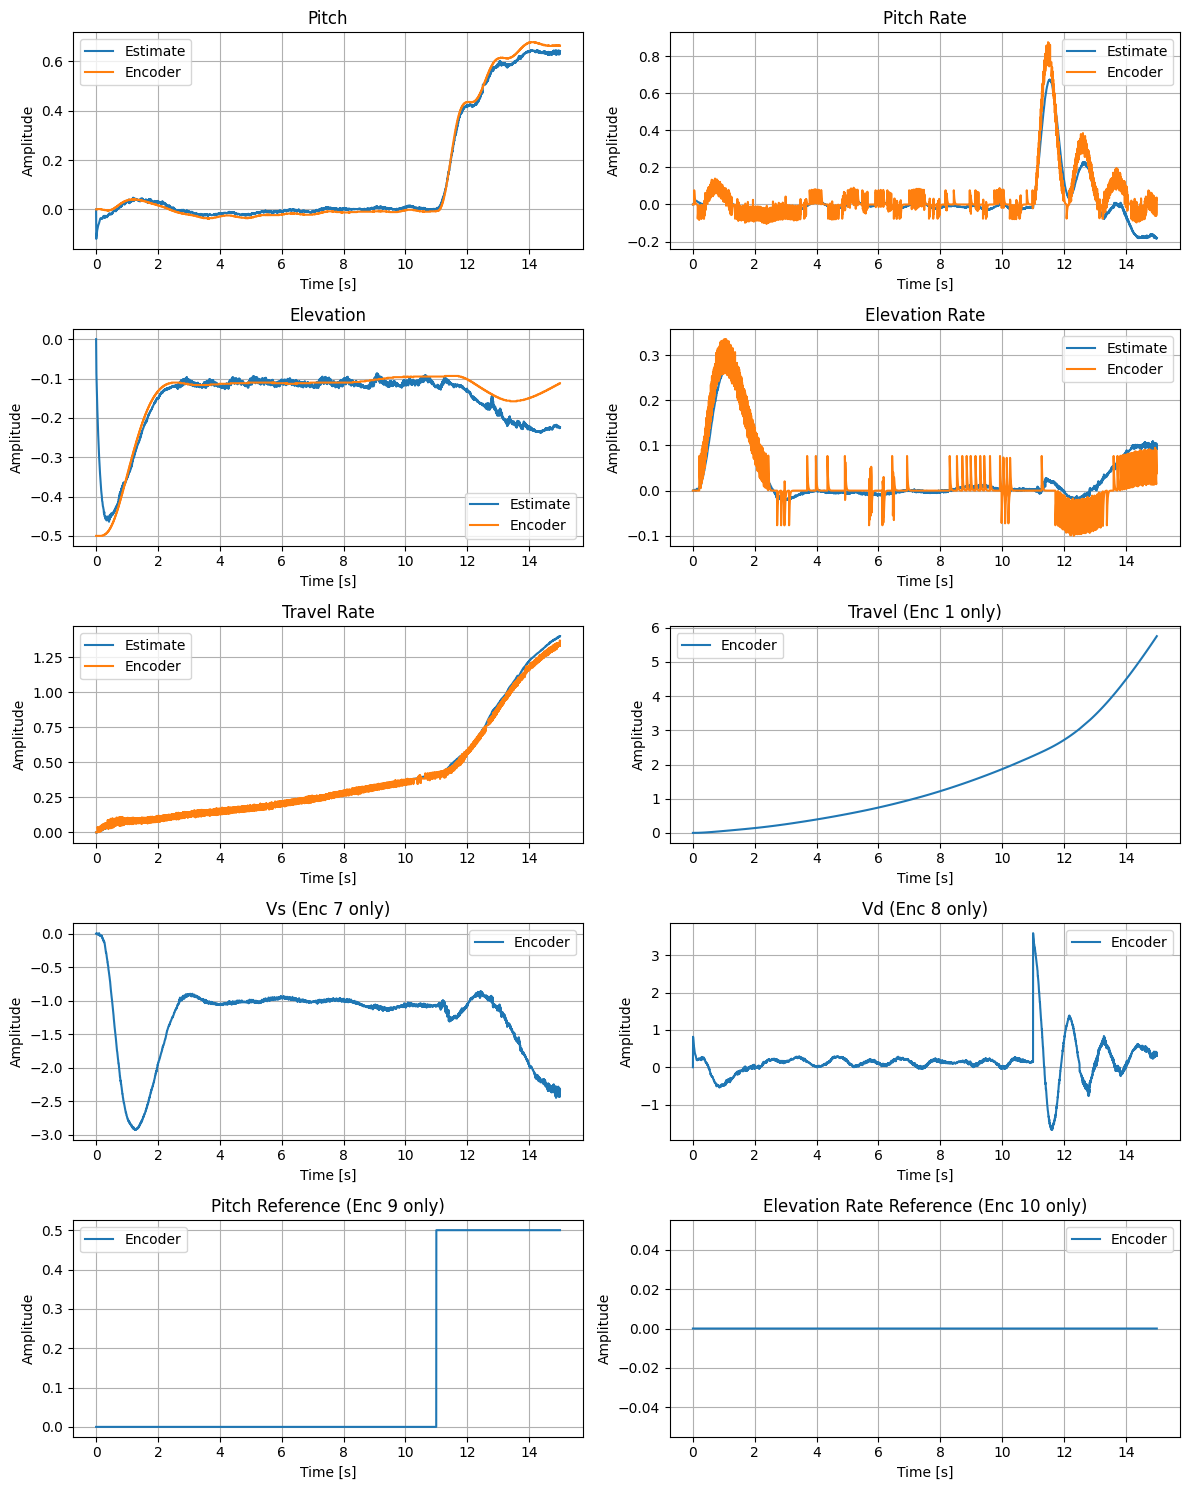

In [22]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np


FILE_EST = 'measurements_lab3/estimate_measurement_Luenberger_minus(13_9_8_10_9).mat' 
FILE_ENC = 'measurements_lab3/encoder_measurement_and_u_Luenberger_minus(13_9_8_10_9).mat'

# -----------------------------------------------------------
# MANUAL SIGNAL MAPPING|
# Left  = estimate signal index
# Right = encoder signal index
#
# Only fill in the pairs you know match.
# Any signal not in this mapping will still be plotted alone.
# -----------------------------------------------------------
MAPPING = {
    1: 3,   # Pitch
    2: 4,   # Pitch Rate
    3: 5,   # Elevation
    4: 6,   # Elevation Rate
    5: 2,   # Rot Rate
}

# Optional display names (fallback: “Signal i”)
LABELS = {
    1: "Pitch",
    2: "Pitch Rate",
    3: "Elevation",
    4: "Elevation Rate",
    5: "Travel Rate",
}

ENCODER_LABELS = {
    1:"Travel",
    7: "Vs",
    8: "Vd",
    9: "Pitch Reference",
    10: "Elevation Rate Reference",
}

# -----------------------------------------------------------
# TIME WINDOW
# -----------------------------------------------------------
t_min = 0
t_max = 15

# -----------------------------------------------------------
# LOAD FILES
# -----------------------------------------------------------
def load_data(path):
    data = scipy.io.loadmat(path)
    print("\nVariables in the .mat file:")
    for key in data.keys():
        if not key.startswith("__"):
            val = data[key]
            print(f"- {key}: shape {val.shape if hasattr(val, 'shape') else type(val)}")
    return data["ans"]

est = load_data(FILE_EST)
enc = load_data(FILE_ENC)

# -----------------------------------------------------------
# TIME CROPPING
# -----------------------------------------------------------
time_est = est[0, :]
time_enc = enc[0, :]

mask_est = (time_est >= t_min) & (time_est <= t_max)
mask_enc = (time_enc >= t_min) & (time_enc <= t_max)

# -----------------------------------------------------------
# Determine which signals exist
# -----------------------------------------------------------
est_signals = set(range(1, est.shape[0]))   # skip index 0 (time)
enc_signals = set(range(1, enc.shape[0]))

mapped_est   = set(MAPPING.keys())
mapped_enc   = {v for v in MAPPING.values() if v is not None}

unmatched_est = est_signals - mapped_est
unmatched_enc = enc_signals - mapped_enc

# -----------------------------------------------------------
# Total number of subplots = matched + unmatched
# -----------------------------------------------------------
total_plots = len([i for i in MAPPING if MAPPING[i] is not None]) \
              + len(unmatched_est) + len(unmatched_enc)

cols = 2
rows = int(np.ceil(total_plots / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3))
axes = axes.flatten()

plot_i = 0

# -----------------------------------------------------------
# 1) Plot matched pairs
# -----------------------------------------------------------
for est_idx, enc_idx in MAPPING.items():
    if enc_idx is None:
        continue

    ax = axes[plot_i]

    est_signal = est[est_idx, mask_est]
    enc_signal = enc[enc_idx, mask_enc]

    ax.plot(time_est[mask_est], est_signal, label="Estimate")
    ax.plot(time_enc[mask_enc], enc_signal, label="Encoder")

    title = LABELS.get(est_idx, f"Signal {est_idx}")
    ax.set_title(title) #+ f" (Est {est_idx} ↔ Enc {enc_idx})"

    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Amplitude")
    ax.grid(True)
    ax.legend()

    plot_i += 1

#There are no signals like this. 
# # -----------------------------------------------------------
# # 2) Plot estimate-only signals
# # -----------------------------------------------------------
# for est_idx in unmatched_est:
#     ax = axes[plot_i]

#     est_signal = est[est_idx, mask_est]
#     ax.plot(time_est[mask_est], est_signal, label="Estimate")

#     title = LABELS.get(est_idx, f"Signal {est_idx}")
#     ax.set_title(title + f" (Est {est_idx} only)")

#     ax.set_xlabel("Time [s]")
#     ax.set_ylabel("Amplitude")
#     ax.grid(True)
#     ax.legend()
#     plot_i += 1

# -----------------------------------------------------------
# 3) Plot encoder-only signals
# -----------------------------------------------------------

for enc_idx in unmatched_enc:
    ax = axes[plot_i]

    enc_signal = enc[enc_idx, mask_enc]
    ax.plot(time_enc[mask_enc], enc_signal, label="Encoder")

    title = ENCODER_LABELS.get(enc_idx, f"Signal {enc_idx}")

    ax.set_title(title + f" (Enc {enc_idx} only)")

    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Amplitude")
    ax.grid(True)
    ax.legend()

    plot_i += 1

plt.tight_layout()
plt.show()
